<center>* Dzisiejsze zajęcia sponsoruje **James Clerk Maxwell** *
<img src="img/maxwell.png",width=200></center>

$$ E_i = -J * S_i * \sum_j S_j $$

$$ P(E) \sim \exp{(-k_b E / T)}$$

$$ P(A -> B) = P(A) P(A | B) \sim P(A)/P(B) \sim \exp{(-k_b/T * (E_B - E_A) )} $$


$$ E_B - E_A = -2 * E_A$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N = 10

spiny = np.ones((N, N), dtype=int)
spiny[::2, ::3] = -1
print(spiny)

[[-1  1  1 -1  1  1 -1  1  1 -1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [-1  1  1 -1  1  1 -1  1  1 -1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [-1  1  1 -1  1  1 -1  1  1 -1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [-1  1  1 -1  1  1 -1  1  1 -1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [-1  1  1 -1  1  1 -1  1  1 -1]
 [ 1  1  1  1  1  1  1  1  1  1]]


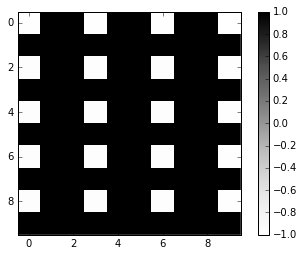

In [3]:
def plot(tablica_spinow):
    fig, ax = plt.subplots()
    IM = ax.imshow(tablica_spinow, interpolation='none', cmap = 'Greys',
                  vmin = -1, vmax = 1)
    plt.colorbar(IM)

plot(spiny)

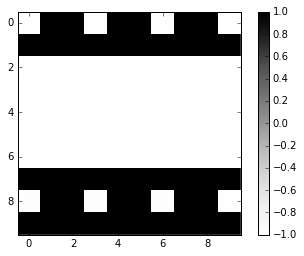

In [4]:
spiny_zmienione = spiny.copy()
spiny_zmienione[int(N/4): int(3/4*N)] = -1
plot(spiny_zmienione)

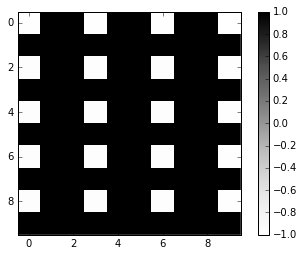

In [5]:
plot(spiny)

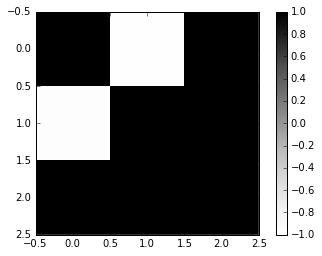

In [6]:
N = 3
spiny = np.random.randint(0, 2, size=(N,N))*2 - 1
plot(spiny)

[[ 1 -1  1]
 [-1  1  1]
 [ 1  1  1]]


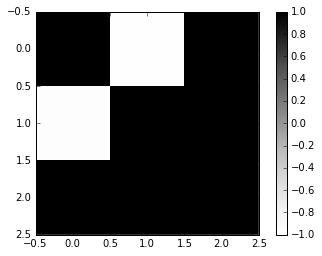

In [7]:
J = 1
k_B = 1
T = 1

np.random.seed(0)
def flip(spiny, T):            #ZMIANA: T JAKO ARGUMENT
    Nx, Ny = spiny.shape
    x = np.random.randint(0, Nx)
    y = np.random.randint(0, Ny)
    # print(x, y, spiny[x, y])
    E = -J * spiny[x, y] * ( spiny[(x-1)%Nx, y] + spiny[x, (y-1)%Ny] +
                            spiny[(x+1)%Nx, y] + spiny[x, (y+1)%Ny])
    deltaE = -2*E
    cutoff = np.exp(-deltaE*k_B/T)
    # jeśli to wyszło od 0 do 1, taki ułamek przerzuceń zaakceptujemy
    # jeśli to wyszło większe od 1, każde przerzucenie akceptujemy
    # print(deltaE)
    
    probability = np.random.random()
    # print(probability, cutoff)
    # print(spiny[x,y])
    if(probability < cutoff):
        # print("flip!")
        spiny[x, y] = spiny[x,y] * -1
        # print(spiny[x,y])
    return spiny
print(spiny)
plot(spiny)

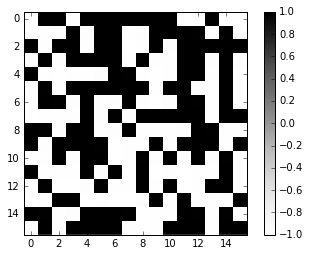

In [8]:
# warunki początkowe
N = 16
NT = 100000

# np.random.seed(0)
spiny = np.random.randint(0, 2, size=(N,N))*2 - 1
plot(spiny)

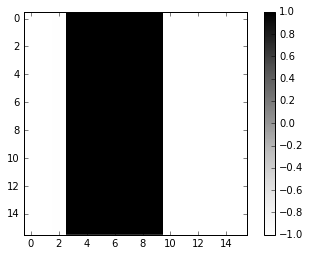

In [9]:
#main loop
for i in range(NT):
    flip(spiny, 0.1)
plot(spiny)

In [10]:
from matplotlib import animation
%matplotlib tk
# w tym momencie warto rozbudować plot() o 
# plt.show()
# w ostatniej linijce, inaczej się nie wyświetli

In [11]:
# warunki początkowe
N = 200
NT = 200000
snap_every = 1000

spiny = np.random.randint(0, 2, size=(N,N))*2 - 1

from scipy import misc
obrazek = misc.imread("img//doge.jpeg")
zmniejszony = (-misc.imresize(obrazek, (N, N))[:,:,0]).astype(int) - 128
# print(zmniejszony.min(), zmniejszony.max())
# print(zmniejszony)
# print(zmniejszony - 128)
# plt.imshow(zmniejszony, cmap='Greys')

# plot(spiny)


def flip2(spiny, T, H):
    Nx, Ny = spiny.shape
    x = np.random.randint(0, Nx)
    y = np.random.randint(0, Ny)
    E = -J * spiny[x, y] * ( spiny[(x-1)%Nx, y] + spiny[x, (y-1)%Ny] +
                            spiny[(x+1)%Nx, y] + spiny[x, (y+1)%Ny]
                            +H[x, y])
    deltaE = -2*E
    cutoff = np.exp(-deltaE*k_B/T)
    probability = np.random.random()
    if(probability < cutoff):
        spiny[x, y] = spiny[x,y] * -1
    return spiny

#main loop
N_snaps = NT//snap_every # int(N/snap_every)

spins_history = np.zeros((N_snaps, N, N))

for i in range(NT):
    if i % snap_every == 0:
        spins_history[i//snap_every] = spiny
    flip2(spiny, 1, zmniejszony)
# plot(spiny)

In [12]:
fig, ax = plt.subplots()
IM = ax.imshow(spiny, cmap='Greys', interpolation='none')

print(NT//snap_every)

def animate(i):
    IM.set_array(spins_history[i])
    return [IM]

anim = animation.FuncAnimation(fig, animate, frames=NT//snap_every, interval=1)
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
FFwriter = animation.FFMpegWriter()
anim.save('animation.mp4', writer = FFwriter, fps=30, extra_args=['-vcodec', 'libx264'])
plt.show()

200
